In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import re

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
results_root_path = "../../results/scripts_new"
script_list = os.listdir(results_root_path)

In [5]:
script_list.sort()

In [6]:
script_list

['fir_cca_fixed_hp_gridsearch',
 'fir_cca_fixed_hp_gridsearch_harmonics_equalized',
 'fir_cca_hp_gridsearch',
 'fir_cca_hp_gridsearch_harmonics_equalized',
 'overall_benchmark',
 'overall_benchmark_3s',
 'overall_benchmark_harmonics_equalized',
 'ss_cca_fixed_hp_gridsearch',
 'ss_cca_fixed_hp_gridsearch_harmonics_equalized',
 'ss_cca_hp_gridsearch',
 'ss_cca_hp_gridsearch_harmonics_equalized']

In [7]:
acc_list = []

for script in script_list:
    runs = os.listdir(f"{results_root_path}/{script}")
    for run in runs:
        acc = np.load(f"{results_root_path}/{script}/{run}/accuracy.npy")
        acc_list.append(
            pd.DataFrame(acc, columns=["correct_predictions", "accuracy"])
            .assign(script=script, run=run)
            .reset_index()
            .rename(columns={"index": "subject"})
        )
    
dataframe = pd.concat(acc_list)

In [8]:
def add_delta_tau_to_dataframe(df):
    
    return df.assign(
        delta=df["run"].apply(lambda x: int(re.findall(r'\d+', x)[0])),
        tau=df["run"].apply(lambda x: int(re.findall(r'\d+', x)[1]))
    )

## Experimento 1

In [9]:
res_ss_cca = (
    dataframe
    .groupby(["script", "run",
              "subject"
             ]).agg({
        "accuracy": "mean",
        "correct_predictions": "sum",
    })
    .loc["ss_cca_hp_gridsearch_harmonics_equalized"]
    .sort_values(by="accuracy", ascending=False)
    .reset_index()
    .pipe(add_delta_tau_to_dataframe)
)

In [10]:
res_ss_cca.groupby(["run", "tau", "delta"])["accuracy"].mean().reset_index().sort_values(by="accuracy", ascending=False)

,run,tau,delta,accuracy
12,"SS-CCA_(2,1)__[2s]",1,2,0.786071
23,"SS-CCA_(3,1)__[2s]",1,3,0.779167
1,"SS-CCA_(1,1)__[2s]",1,1,0.775357
25,"SS-CCA_(4,1)__[2s]",1,4,0.765714
26,"SS-CCA_(5,1)__[2s]",1,5,0.755357
0,"SS-CCA_(0,1)__[2s]",1,0,0.745714
27,"SS-CCA_(6,1)__[2s]",1,6,0.736905
28,"SS-CCA_(7,1)__[2s]",1,7,0.717500
14,"SS-CCA_(21,1)__[2s]",1,21,0.706071
15,"SS-CCA_(22,1)__[2s]",1,22,0.705000


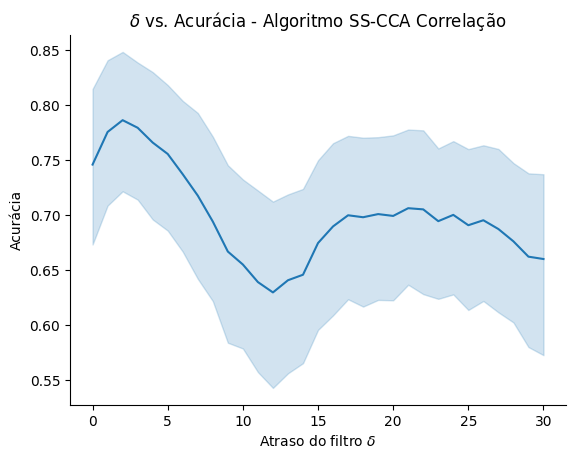

In [11]:
# plt.figure(figsize=(8,4))
ax = sns.lineplot(
    data=res_ss_cca.sort_values("delta"),
    x="delta",
    y="accuracy"
)
ax.set_ylabel("Acurácia")
ax.set_xlabel("Atraso do filtro $\delta$")
ax.set_title("$\delta$ vs. Acurácia - Algoritmo SS-CCA Correlação")
sns.despine()

plt.savefig("images/delta_acc_ss_cca_correlacao.svg", format="svg", dpi=2000)
plt.show()

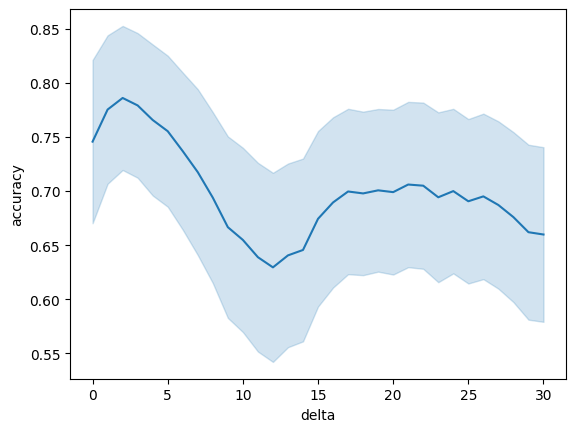

In [12]:
ax = sns.lineplot(
    data=res_ss_cca.sort_values("delta"),
    x="delta",
    y="accuracy",
    errorbar=('se', 2)
)

# "ci”, “pi”, “se”, or “sd”

In [13]:
res_ss_cca_fixed = (
    dataframe
    .groupby(["script", "run",
              "subject"
             ]).agg({
        "accuracy": "mean",
        "correct_predictions": "sum",
    })
    .loc["ss_cca_fixed_hp_gridsearch_harmonics_equalized"]
    .sort_values(by="accuracy", ascending=False)
    .reset_index()
    .pipe(add_delta_tau_to_dataframe)
)

In [14]:
res_ss_cca_fixed.groupby(["run", "tau", "delta"])["accuracy"].mean().reset_index().sort_values(by="accuracy", ascending=False)

,run,tau,delta,accuracy
23,"SS-CCA_(3,1)_fixed__[2s]",1,3,0.964762
12,"SS-CCA_(2,1)_fixed__[2s]",1,2,0.963333
25,"SS-CCA_(4,1)_fixed__[2s]",1,4,0.961310
1,"SS-CCA_(1,1)_fixed__[2s]",1,1,0.959524
26,"SS-CCA_(5,1)_fixed__[2s]",1,5,0.955714
27,"SS-CCA_(6,1)_fixed__[2s]",1,6,0.950952
28,"SS-CCA_(7,1)_fixed__[2s]",1,7,0.941310
29,"SS-CCA_(8,1)_fixed__[2s]",1,8,0.932262
0,"SS-CCA_(0,1)_fixed__[2s]",1,0,0.932024
15,"SS-CCA_(22,1)_fixed__[2s]",1,22,0.927381


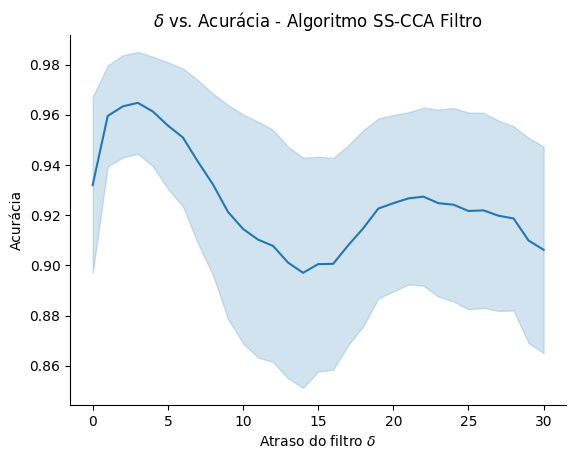

In [15]:
# plt.figure(figsize=(8,4))
ax = sns.lineplot(
    data=res_ss_cca_fixed.sort_values("delta"),
    x="delta",
    y="accuracy",
    errorbar=("se", 2)
)
ax.set_ylabel("Acurácia")
ax.set_xlabel("Atraso do filtro $\delta$")
ax.set_title("$\delta$ vs. Acurácia - Algoritmo SS-CCA Filtro")
sns.despine()

plt.savefig("images/delta_acc_ss_cca_filtro.svg", format="svg", dpi=2000)
plt.show()

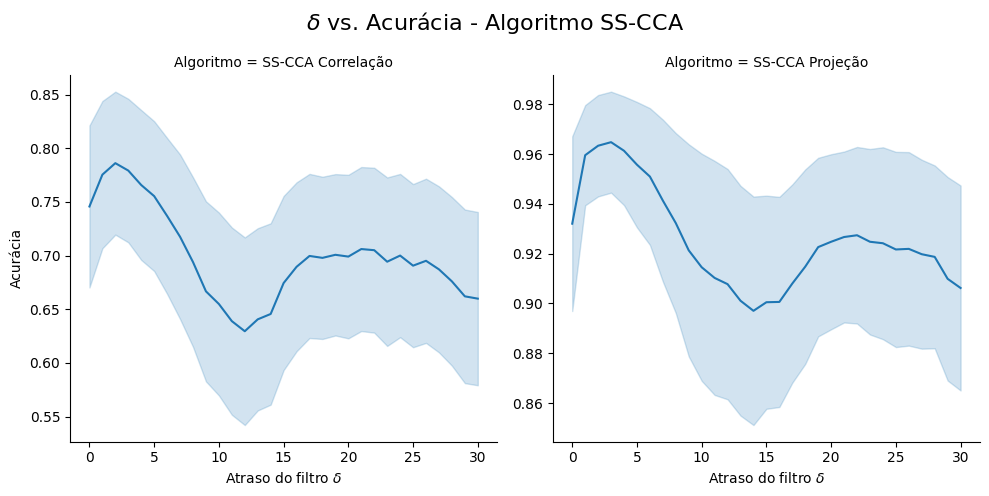

In [16]:
res_fir_cca_all = (
    dataframe
    .groupby(["script", "run",
              "subject"
             ]).agg({
        "accuracy": "mean",
        "correct_predictions": "sum",
    })
    .loc[["ss_cca_hp_gridsearch_harmonics_equalized", "ss_cca_fixed_hp_gridsearch_harmonics_equalized"]]
    .sort_values(by="accuracy", ascending=False)
    .reset_index()
    .pipe(add_delta_tau_to_dataframe)
    [lambda x: x["tau"]<=30]
    .assign(Algoritmo=lambda x: x["script"].map({
        "ss_cca_hp_gridsearch_harmonics_equalized": "SS-CCA Correlação",
        "ss_cca_fixed_hp_gridsearch_harmonics_equalized": "SS-CCA Projeção",
    }))
)

g = sns.relplot(
    data=res_fir_cca_all.sort_values(["delta", "script"]),
    x="delta",
    y="accuracy",
    col="Algoritmo",
    col_order=["SS-CCA Correlação", "SS-CCA Projeção"],
    errorbar=("se", 2),
    kind="line",
    facet_kws={"sharey": False}
)

g.set_ylabels("Acurácia")
g.set_xlabels("Atraso do filtro $\delta$")
g.fig.suptitle("$\delta$ vs. Acurácia - Algoritmo SS-CCA", fontsize=16)
g.fig.subplots_adjust(top=.85)
sns.despine()

plt.savefig("images/delta_acc_ss_cca_all.svg", format="svg", dpi=2000)
plt.show()

## Experimento 2

In [17]:
res_fir_cca = (
    dataframe
    .groupby(["script", "run",
              "subject"
             ]).agg({
        "accuracy": "mean",
        "correct_predictions": "sum",
    })
    .loc["fir_cca_hp_gridsearch_harmonics_equalized"]
    .sort_values(by="accuracy", ascending=False)
    .reset_index()
    .pipe(add_delta_tau_to_dataframe)
)

In [18]:
res_fir_cca.groupby(["run", "tau", "delta"])["accuracy"].mean().reset_index().sort_values(by="accuracy", ascending=False)

,run,tau,delta,accuracy
7,"SS-CCA_(0,4)__[2s]",4,0,0.804524
9,"SS-CCA_(0,5)__[2s]",5,0,0.800952
11,"SS-CCA_(0,6)__[2s]",6,0,0.799405
5,"SS-CCA_(0,3)__[2s]",3,0,0.797738
12,"SS-CCA_(0,7)__[2s]",7,0,0.791071
13,"SS-CCA_(0,8)__[2s]",8,0,0.783690
3,"SS-CCA_(0,2)__[2s]",2,0,0.775714
14,"SS-CCA_(0,9)__[2s]",9,0,0.775476
2,"SS-CCA_(0,10)__[2s]",10,0,0.764167
1,"SS-CCA_(0,1)__[2s]",1,0,0.745714


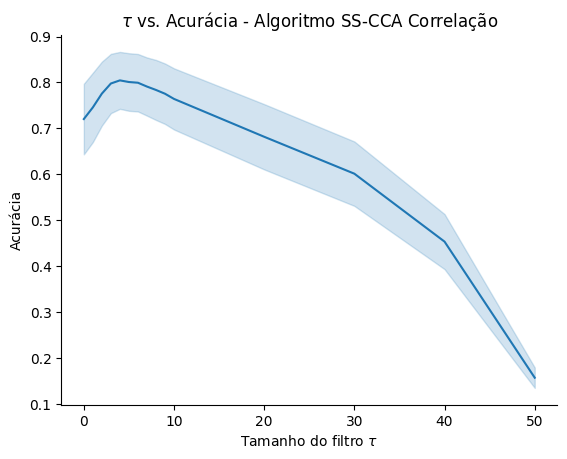

In [19]:
# plt.figure(figsize=(8,4))
ax = sns.lineplot(
    data=res_fir_cca.sort_values("delta"),
    x="tau",
    y="accuracy",
    errorbar=("se", 2)
)
ax.set_ylabel("Acurácia")
ax.set_xlabel("Tamanho do filtro $\u03C4$")
ax.set_title("$\u03C4$ vs. Acurácia - Algoritmo SS-CCA Correlação")
sns.despine()

plt.savefig("images/tau_acc_fir_cca_correlacao.svg", format="svg", dpi=2000)
plt.show()

In [20]:
res_fir_cca_fixed = (
    dataframe
    .groupby(["script", "run",
              "subject"
             ]).agg({
        "accuracy": "mean",
        "correct_predictions": "sum",
    })
    .loc["fir_cca_fixed_hp_gridsearch_harmonics_equalized"]
    .sort_values(by="accuracy", ascending=False)
    .reset_index()
    .pipe(add_delta_tau_to_dataframe)
)

In [21]:
res_fir_cca_fixed.groupby(["run", "tau", "delta"])["accuracy"].mean().reset_index().sort_values(by="accuracy", ascending=False)

,run,tau,delta,accuracy
9,"SS-CCA_(0,5)_fixed__[2s]",5,0,0.970238
7,"SS-CCA_(0,4)_fixed__[2s]",4,0,0.970000
11,"SS-CCA_(0,6)_fixed__[2s]",6,0,0.969881
12,"SS-CCA_(0,7)_fixed__[2s]",7,0,0.969286
13,"SS-CCA_(0,8)_fixed__[2s]",8,0,0.968095
14,"SS-CCA_(0,9)_fixed__[2s]",9,0,0.968095
2,"SS-CCA_(0,10)_fixed__[2s]",10,0,0.965833
5,"SS-CCA_(0,3)_fixed__[2s]",3,0,0.965476
3,"SS-CCA_(0,2)_fixed__[2s]",2,0,0.958690
4,"SS-CCA_(0,20)_fixed__[2s]",20,0,0.952857


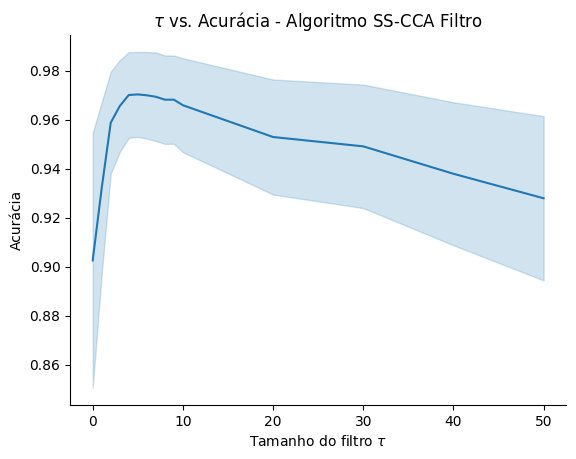

In [22]:
ax = sns.lineplot(
    data=res_fir_cca_fixed.sort_values("delta"),
    x="tau",
    y="accuracy",
    errorbar=("se", 2)
)
ax.set_ylabel("Acurácia")
ax.set_xlabel("Tamanho do filtro $\u03C4$")
ax.set_title("$\u03C4$ vs. Acurácia - Algoritmo SS-CCA Filtro")
sns.despine()

plt.savefig("images/tau_acc_fir_cca_filtro.svg", format="svg", dpi=2000)
plt.show()

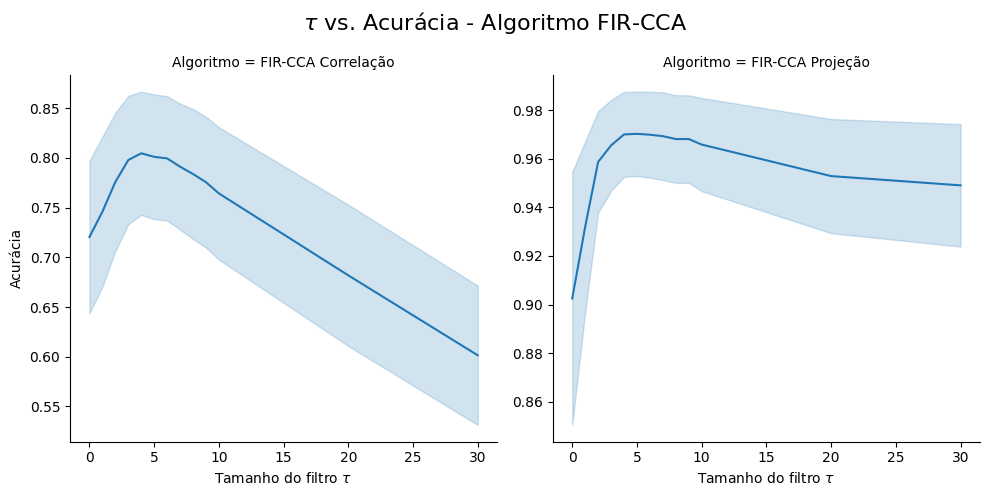

In [23]:
res_fir_cca_all = (
    dataframe
    .groupby(["script", "run",
              "subject"
             ]).agg({
        "accuracy": "mean",
        "correct_predictions": "sum",
    })
    .loc[["fir_cca_hp_gridsearch_harmonics_equalized", "fir_cca_fixed_hp_gridsearch_harmonics_equalized"]]
    .sort_values(by="accuracy", ascending=False)
    .reset_index()
    .pipe(add_delta_tau_to_dataframe)
    [lambda x: x["tau"]<=30]
    .assign(Algoritmo=lambda x: x["script"].map({
        "fir_cca_hp_gridsearch_harmonics_equalized": "FIR-CCA Correlação",
        "fir_cca_fixed_hp_gridsearch_harmonics_equalized": "FIR-CCA Projeção",
    }))
)

g = sns.relplot(
    data=res_fir_cca_all.sort_values(["delta", "script"]),
    x="tau",
    y="accuracy",
    col="Algoritmo",
    col_order=["FIR-CCA Correlação", "FIR-CCA Projeção"],
    errorbar=("se", 2),
    kind="line",
    facet_kws={"sharey": False}
)

g.set_ylabels("Acurácia")
g.set_xlabels("Tamanho do filtro $\u03C4$")
g.fig.suptitle("$\u03C4$ vs. Acurácia - Algoritmo FIR-CCA", fontsize=16)
g.fig.subplots_adjust(top=.85)
sns.despine()

plt.savefig("images/tau_acc_fir_cca_all.svg", format="svg", dpi=2000)
plt.show()

## Experimento 3

In [49]:
# overall_2s = (
#     dataframe.groupby(["script", "run"]).agg({
#         "accuracy": "mean",
#         "correct_predictions": "sum",
#     })
#     .sort_values(by="accuracy", ascending=False)
#     .loc["overall_benchmark_harmonics_equalized"].sort_index()
#     .reset_index()
# )


In [50]:
overall_2s = (
    dataframe.groupby(["script", "run"]).agg(**{
        "accuracy_mean": pd.NamedAgg(column='accuracy', aggfunc='mean'),
        "accuracy_std": pd.NamedAgg(column='accuracy', aggfunc='std'),
        "accuracy_count": pd.NamedAgg(column='accuracy', aggfunc='count'),
        "correct_predictions": pd.NamedAgg(column='correct_predictions', aggfunc='sum')
    })
    .assign(accuracy_se = lambda x: x["accuracy_std"] / x["accuracy_count"])
    .sort_values(by="accuracy_mean", ascending=False)
    .loc["overall_benchmark_harmonics_equalized"].sort_index()
    .reset_index()
)

In [51]:
overall_2s

,run,accuracy_mean,accuracy_std,accuracy_count,correct_predictions,accuracy_se
0,01_Default_CCA_[2s],0.720357,0.227143,35,6051.0,0.006490
1,"02_SS-CCA_(3,1)_[2s]",0.779167,0.197712,35,6545.0,0.005649
2,"03_SS-CCA_(0,5)_[2s]",0.800952,0.185372,35,6728.0,0.005296
3,04_Filterbank_CCA_[2s],0.847619,0.186873,35,7120.0,0.005339
4,"05_Filterbank_SS-CCA_(3,1)_[2s]",0.798214,0.218180,35,6705.0,0.006234
5,"06_Filterbank_SS-CCA_(0,5)_[2s]",0.568214,0.217187,35,4773.0,0.006205
6,07_Default_CCA_Fixed_[2s],0.902500,0.153955,35,7581.0,0.004399
7,"08_SS-CCA_(3,1)_Fixed_[2s]",0.964762,0.060002,35,8104.0,0.001714
8,"09_SS-CCA_(0,5)_Fixed_[2s]",0.970238,0.051312,35,8150.0,0.001466
9,10_Filterbank_CCA_Fixed_[2s],0.958810,0.076468,35,8054.0,0.002185


In [52]:
overall_2s["Configuracao"] = overall_2s["run"].str.contains("Fixed").map({False: "Correlação",
                                                                          True: "Projeção"})

overall_2s["Acurácia"] = overall_2s["accuracy_mean"].round(3)
overall_2s["Desvio Padrão"] = overall_2s["accuracy_std"].round(3)

def clean_run_name(s):
    l = s.replace("_Fixed", "").split("_")[1:-1]
    return "_".join(l)

overall_2s["Algoritmo"] = overall_2s["run"].apply(clean_run_name)
overall_2s

,run,accuracy_mean,accuracy_std,accuracy_count,correct_predictions,accuracy_se,Configuracao,Acurácia,Desvio Padrão,Algoritmo
0,01_Default_CCA_[2s],0.720357,0.227143,35,6051.0,0.006490,Correlação,0.720,0.227,Default_CCA
1,"02_SS-CCA_(3,1)_[2s]",0.779167,0.197712,35,6545.0,0.005649,Correlação,0.779,0.198,"SS-CCA_(3,1)"
2,"03_SS-CCA_(0,5)_[2s]",0.800952,0.185372,35,6728.0,0.005296,Correlação,0.801,0.185,"SS-CCA_(0,5)"
3,04_Filterbank_CCA_[2s],0.847619,0.186873,35,7120.0,0.005339,Correlação,0.848,0.187,Filterbank_CCA
4,"05_Filterbank_SS-CCA_(3,1)_[2s]",0.798214,0.218180,35,6705.0,0.006234,Correlação,0.798,0.218,"Filterbank_SS-CCA_(3,1)"
5,"06_Filterbank_SS-CCA_(0,5)_[2s]",0.568214,0.217187,35,4773.0,0.006205,Correlação,0.568,0.217,"Filterbank_SS-CCA_(0,5)"
6,07_Default_CCA_Fixed_[2s],0.902500,0.153955,35,7581.0,0.004399,Projeção,0.902,0.154,Default_CCA
7,"08_SS-CCA_(3,1)_Fixed_[2s]",0.964762,0.060002,35,8104.0,0.001714,Projeção,0.965,0.060,"SS-CCA_(3,1)"
8,"09_SS-CCA_(0,5)_Fixed_[2s]",0.970238,0.051312,35,8150.0,0.001466,Projeção,0.970,0.051,"SS-CCA_(0,5)"
9,10_Filterbank_CCA_Fixed_[2s],0.958810,0.076468,35,8054.0,0.002185,Projeção,0.959,0.076,Filterbank_CCA


In [53]:
overall_2s.set_index(["Configuracao", "Algoritmo"])[["Acurácia", "Desvio Padrão"]].unstack(0).columns.names

FrozenList([None, 'Configuracao'])

In [54]:
overall_2s_pivot = overall_2s.set_index(["Configuracao", "Algoritmo"])[["Acurácia", "Desvio Padrão"]].unstack(0)
overall_2s_pivot.columns.names = ["Métrica", "Configuração"]
overall_2s_pivot = overall_2s_pivot.reorder_levels(["Configuração", "Métrica"], axis=1)
overall_2s_pivot = overall_2s_pivot.reindex(sorted(overall_2s_pivot.columns), axis=1)

In [55]:
overall_2s_pivot

Configuração            Correlação               Projeção              
Métrica                   Acurácia Desvio Padrão Acurácia Desvio Padrão
Algoritmo                                                              
Default_CCA                  0.720         0.227    0.902         0.154
Filterbank_CCA               0.848         0.187    0.959         0.076
Filterbank_SS-CCA_(0,5)      0.568         0.217    0.962         0.069
Filterbank_SS-CCA_(3,1)      0.798         0.218    0.958         0.074
SS-CCA_(0,5)                 0.801         0.185    0.970         0.051
SS-CCA_(3,1)                 0.779         0.198    0.965         0.060

In [71]:
algorithm_name_map = {
    "Default_CCA": "CCA Default",
    "SS-CCA_(3,1)": "SS-CCA",
    "SS-CCA_(0,5)": "FIR-CCA",
    "Filterbank_CCA": "FB-CCA",
    "Filterbank_SS-CCA_(3,1)": "FB-SS-CCA",
    "Filterbank_SS-CCA_(0,5)": "FB-FIR-CCA",
}

algorithm_order = [
    "CCA Default",
    "FB-CCA",
    "SS-CCA",
    "FIR-CCA",
    "FB-SS-CCA",
    "FB-FIR-CCA",
]

overall_2s_pivot.index = overall_2s_pivot.index.map(algorithm_name_map)

In [72]:
print(overall_2s_pivot.loc[algorithm_order].to_latex(decimal=","))
overall_2s_pivot.loc[algorithm_order]

\begin{tabular}{lrrrr}
\toprule
Configuração & \multicolumn{2}{r}{Correlação} & \multicolumn{2}{r}{Projeção} \\
Métrica & Acurácia & Desvio Padrão & Acurácia & Desvio Padrão \\
Algoritmo &  &  &  &  \\
\midrule
CCA Default & 0,720000 & 0,227000 & 0,902000 & 0,154000 \\
FB-CCA & 0,848000 & 0,187000 & 0,959000 & 0,076000 \\
SS-CCA & 0,779000 & 0,198000 & 0,965000 & 0,060000 \\
FIR-CCA & 0,801000 & 0,185000 & 0,970000 & 0,051000 \\
FB-SS-CCA & 0,798000 & 0,218000 & 0,958000 & 0,074000 \\
FB-FIR-CCA & 0,568000 & 0,217000 & 0,962000 & 0,069000 \\
\bottomrule
\end{tabular}



Configuração Correlação               Projeção              
Métrica        Acurácia Desvio Padrão Acurácia Desvio Padrão
Algoritmo                                                   
CCA Default       0.720         0.227    0.902         0.154
FB-CCA            0.848         0.187    0.959         0.076
SS-CCA            0.779         0.198    0.965         0.060
FIR-CCA           0.801         0.185    0.970         0.051
FB-SS-CCA         0.798         0.218    0.958         0.074
FB-FIR-CCA        0.568         0.217    0.962         0.069

In [59]:
overall_2s = overall_2s.set_index(["Configuracao", "Algoritmo"])["Acurácia"].unstack(0).iloc[[
    0, 5, 4, 1, 3, 2
]]
overall_2s

Configuracao,Correlação,Projeção
Algoritmo,,
Default_CCA,0.720,0.902
"SS-CCA_(3,1)",0.779,0.965
"SS-CCA_(0,5)",0.801,0.970
Filterbank_CCA,0.848,0.959
"Filterbank_SS-CCA_(3,1)",0.798,0.958
"Filterbank_SS-CCA_(0,5)",0.568,0.962


In [60]:
overall_2s.index = overall_2s.index.map(algorithm_name_map)

In [61]:
overall_2s.index.name = "Algoritmo"
print(overall_2s.to_latex(decimal=","))
overall_2s

\begin{tabular}{lrr}
\toprule
Configuracao & Correlação & Projeção \\
Algoritmo &  &  \\
\midrule
CCA Default & 0,720000 & 0,902000 \\
SS-CCA & 0,779000 & 0,965000 \\
FIR-CCA & 0,801000 & 0,970000 \\
FB-CCA & 0,848000 & 0,959000 \\
FB-SS-CCA & 0,798000 & 0,958000 \\
FB-FIR-CCA & 0,568000 & 0,962000 \\
\bottomrule
\end{tabular}



Configuracao,Correlação,Projeção
Algoritmo,,
CCA Default,0.720,0.902
SS-CCA,0.779,0.965
FIR-CCA,0.801,0.970
FB-CCA,0.848,0.959
FB-SS-CCA,0.798,0.958
FB-FIR-CCA,0.568,0.962


In [62]:
dataframe.groupby(["script", "run"]).agg({
    "accuracy": "mean",
    "correct_predictions": "sum",
}).sort_values(by="accuracy", ascending=False).loc["overall_benchmark_3s"].sort_index()

,accuracy,correct_predictions
run,,
01_Default_CCA_[3s],0.835714,7020.0
"02_SS-CCA_(3,1)_[3s]",0.891310,7487.0
"03_SS-CCA_(0,5)_[3s]",0.911667,7658.0
04_Filterbank_CCA_[3s],0.936310,7865.0
"05_Filterbank_SS-CCA_(3,1)_[3s]",0.920357,7731.0
07_Default_CCA_Fixed_[3s],0.944881,7937.0
"08_SS-CCA_(3,1)_Fixed_[3s]",0.982024,8249.0
"09_SS-CCA_(0,5)_Fixed_[3s]",0.985595,8279.0
10_Filterbank_CCA_Fixed_[3s],0.984881,8273.0


In [63]:
dataframe.groupby(["script", "run"]).agg({
    "accuracy": "mean",
    "correct_predictions": "sum",
}).sort_values(by="accuracy", ascending=False).loc["overall_benchmark_harmonics_equalized"].sort_index()

,accuracy,correct_predictions
run,,
01_Default_CCA_[2s],0.720357,6051.0
"02_SS-CCA_(3,1)_[2s]",0.779167,6545.0
"03_SS-CCA_(0,5)_[2s]",0.800952,6728.0
04_Filterbank_CCA_[2s],0.847619,7120.0
"05_Filterbank_SS-CCA_(3,1)_[2s]",0.798214,6705.0
"06_Filterbank_SS-CCA_(0,5)_[2s]",0.568214,4773.0
07_Default_CCA_Fixed_[2s],0.902500,7581.0
"08_SS-CCA_(3,1)_Fixed_[2s]",0.964762,8104.0
"09_SS-CCA_(0,5)_Fixed_[2s]",0.970238,8150.0


# Anotações

CCA
- numero de harmonicas
- tamanho da janela
- lista de eletrodos

Spatial:
- tamanho do passo
- tamanho da janela
+ experimentar fazer a curva de desempenho vs tamanho da janela, fixando o passo em 0
+ explicar que estamos usando os primeiro 500ms para preencher o filtro FIR das primeiras amostras

Filter bank:
- número de filtros
- hiperparâmetros do kernel arbitrário

## Revisão bibliográfica

- Artigo 2011: algoritmo que detecta a fase
- Artigo de 2014a: usa o EEG de treino averaged como um sinal de referência para o CCA
- Artigo de 2014b: utiliza o CCA como estimador de um filtro espacial que é utilizado em seguida (identico ao que estamos chamando de fixed).


## Experimentos

Sempre janelas de 2 segundos

Hiperparametros:

- SS
    - testes vários gaps, sempre com janela de tamanho 1
    - treinando e sem treino
- FIR
    - gap = 0, mas vários tamanhos de janela
    - treinando e sem treino


CCA-correlation

- CCA Original
- SS-CCA Original (PEGAR HIPERPARAMETRO DO ARTIGO)
- CCA FIR
- FB-CCA
- FB-CCA SS
- FB-CCA FIR


Depois com fixed

- CCA Original (with training)
- SS-CCA Original (PEGAR HIPERPARAMETRO DO ARTIGO)
- CCA FIR (with training) ==> testar janelas diferentes, variar até algum máximo
- FB-CCA (with training)
- FB-CCA with FIR-filter (with training)


## Ficou faltando:

- Utilizar o dado de treinamento inteiro (sem filtrar os primeiros segundos)

Qualificação até final de setembro
- 15 dias de antecedência pra entrar com pedido
- teria que estar pronto no dia que abre o pedido
- olhar instruções na página da pós-graduação da FEEC
- aluno que marca
- https://www.fee.unicamp.br/pos-graduacao/alunos-regulares/
    > vida academica
    > >exame de qualificação

Proposta:

- Uso de mais atrasos no vetor de variáveis aleatórias
    - Expandindo o algoritmo proposto Spatio-temporal CCA
    - É como se fosse um "banco de filtros FIR"
- Contraste entre aplicação do CCA janela a janela vs. CCA com a fase e vetor de pesos fixo:
    - Fazer uma revisão dos artigos citados no Artigo de 2015
    - Subproposta: combinar FB-CCA com CCA pesos fixos para maximizar performance

Conclusão: o que está feito e o que falta fazer

- Ajuste do kernel linear que combina múltiplos processos CCA numa correlação final

- No texto, descrever os processos via diagrama
- Primeiramente colocar os resultados e ver quanto espaço sobra
- Citar o trabalho para explicar os modelos CCA que usam dado de treinamento e
    - discutir que essa abordagem faz uso da fase
    - por isso é necessario que o sinal de referência tenha sempre a mesma diferença de fase inicial em relação a estimulação
- Priorizar explicar o CCA
- Os outros algoritmos podem ser explicados de maneira mais simples

Próximos passos:

- Utilizar dados dos 70 candidatos da base chinesa
- Usar dados coletados no lab
- Publicação em revista